In [32]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
from random import randint

import matplotlib.pyplot as plt

In [3]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")
print(f"Device name: {torch.cuda.get_device_name()}")


Using cuda device
Device name: Quadro P2000


In [4]:
DATA_PATH = "./mnist/"

In [7]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root=DATA_PATH,
    train=True,
    download=False,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root=DATA_PATH,
    train=False,
    download=False,
    transform=ToTensor(),
)

In [8]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [9]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [12]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [13]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [14]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306205  [   64/60000]
loss: 0.269158  [ 6464/60000]
loss: 0.197609  [12864/60000]
loss: 0.257545  [19264/60000]
loss: 0.134046  [25664/60000]
loss: 0.300597  [32064/60000]
loss: 0.128403  [38464/60000]
loss: 0.225895  [44864/60000]
loss: 0.239996  [51264/60000]
loss: 0.156986  [57664/60000]
Test Error: 
 Accuracy: 95.2%, Avg loss: 0.150466 

Epoch 2
-------------------------------
loss: 0.082593  [   64/60000]
loss: 0.090038  [ 6464/60000]
loss: 0.128183  [12864/60000]
loss: 0.148941  [19264/60000]
loss: 0.048679  [25664/60000]
loss: 0.074563  [32064/60000]
loss: 0.047576  [38464/60000]
loss: 0.143167  [44864/60000]
loss: 0.117211  [51264/60000]
loss: 0.101119  [57664/60000]
Test Error: 
 Accuracy: 96.0%, Avg loss: 0.124694 

Epoch 3
-------------------------------
loss: 0.079390  [   64/60000]
loss: 0.062266  [ 6464/60000]
loss: 0.047752  [12864/60000]
loss: 0.089220  [19264/60000]
loss: 0.060692  [25664/60000]
loss: 0.065961  [32064/600

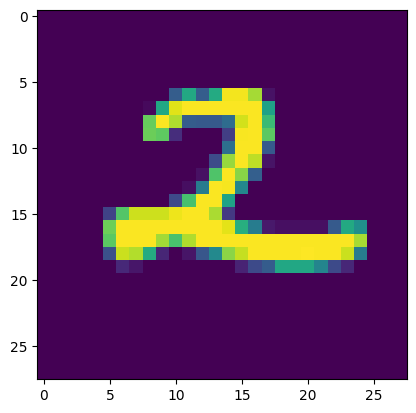

Predict: 2


In [45]:
random_index = randint(0, 9999)

x = test_data[random_index][0].to(device=device)

plt.imshow(x.squeeze().cpu())
plt.show()

pred = model(x).argmax()
print(f"Predict: {pred}")